# OCR DETECTION MODEL

In [1]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from gtts import gTTS

/Users/shivanggulati/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## TRAINING THE MODEL

In [2]:
dataset_path = "datapath/to/train"
img_width, img_height, channels = 28, 28, 1

def load_images(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                img_path = os.path.join(class_path, image_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_width, img_height))
                img = img / 255.0
                images.append(img)
                labels.append(class_name)
    return np.array(images), np.array(labels)

X_train, y_train = load_images(dataset_path)
X_train = X_train.reshape(-1, img_width, img_height, channels)
label_to_int = {label: i for i, label in enumerate(np.unique(y_train))}
y_train = np.array([label_to_int[label] for label in y_train])

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels))) #32 filters and 3 x 3 model
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) #128 neurons in dense layer
model.add(layers.Dense(len(label_to_int), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=18, batch_size=32)

model.save('OCR_Model')

Epoch 1/18
 1/27 [>.............................] - ETA: 11s - loss: 3.5971 - accuracy: 0.0000e+00

2024-01-09 17:32:09.436901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


27/27 [==============================] - 1s 9ms/step - loss: 3.0005 - accuracy: 0.2512
Epoch 2/18
27/27 [==============================] - 0s 7ms/step - loss: 0.9090 - accuracy: 0.7442
Epoch 3/18
27/27 [==============================] - 0s 9ms/step - loss: 0.3125 - accuracy: 0.8958
Epoch 4/18
27/27 [==============================] - 0s 8ms/step - loss: 0.1308 - accuracy: 0.9630
Epoch 5/18
27/27 [==============================] - 0s 9ms/step - loss: 0.0991 - accuracy: 0.9676
Epoch 6/18
27/27 [==============================] - 0s 8ms/step - loss: 0.0621 - accuracy: 0.9769
Epoch 7/18
27/27 [==============================] - 0s 7ms/step - loss: 0.0818 - accuracy: 0.9699
Epoch 8/18
27/27 [==============================] - 0s 6ms/step - loss: 0.0742 - accuracy: 0.9780
Epoch 9/18
27/27 [==============================] - 0s 7ms/step - loss: 0.0513 - accuracy: 0.9826
Epoch 10/18
27/27 [==============================] - 0s 6ms/step - loss: 0.0470 - accuracy: 0.9826
Epoch 11/18
27/27 [===========

INFO:tensorflow:Assets written to: OCR_Model_Task-5/assets


In [3]:
# Define the path to your testing dataset
testing_dataset_path = "datapath/to/val"

# Function to load and preprocess testing images
def load_testing_images(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                img_path = os.path.join(class_path, image_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_width, img_height))
                img = img / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(class_name)
    return np.array(images), np.array(labels)

# Load and preprocess the testing dataset
X_test, y_test = load_testing_images(testing_dataset_path)

# Reshape the data for CNN input
X_test = X_test.reshape(-1, img_width, img_height, channels)

# Convert labels to integers using the same label_to_int mapping
y_test = np.array([label_to_int[label] for label in y_test])

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


27/27 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9931
Training Accuracy: 99.31%
7/7 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.9907
Test Accuracy: 99.07%


## PLATE DETECTION

In [4]:
import numpy as np
import cv2

def find_contours(dimensions, img) :

    # take out all con
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    print('*'*20)
    print('log before contour detection ')
    print(img.shape)
    print()
    print('width of license plate is == ',img.shape[0])
    print('lower_width = ',lower_width)
    print('upper_width = ',upper_width)
    
    print()
    print('HEIGHT of license plate is == ',img.shape[1])
    print('lower height = ',lower_height)
    print('upper_height = ',upper_height)
    print('*'*20)

    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    ii=img.copy()
    print('image intitalized')
    disp_img(ii)

    x_cntr_list = []
    target_contours = []
    img_res = []
    cnt=0
    for i,cntr in enumerate(cntrs) :
        #detects con and returns binary
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        print('#'*40)
        print('contour stats are')
        print('intx is == ',intX)
        print('inty is == ',intY)
        print('contour width is == ',intWidth)
        print('contour height is == ',intHeight)
        print('#'*20)
        print('*'*40)
        print('lower_width = ',lower_width)
        print('width of char contour is = ',intWidth)
        print('upper_width = ',upper_width)
        print()
        print('lower height = ',lower_height)
        print('height of char contour is = ',intHeight)
        print('upper_height = ',upper_height)
        print('*'*20)
        
        #checking the dimensions to filter out chars
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            cnt+=1   
            print('[*]'*20)
            print('character detected')
            print('[*]'*20)

            x_cntr_list.append(intX) #x cordinate storing for easy indexing for later use 

            char_copy = np.zeros((44,24))
            #char extraction
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            print('char extracted')
            disp_img(char)
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            print('contour extracted')
            disp_img(ii)

            plt.title('contours')
            plt.imshow(ii, cmap='gray')

            char = cv2.subtract(255, char)

            # 24x44 resize
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            if cnt>10:
              break
            img_res.append(char_copy) #List that stores the chars binary image - unsorted
                        
    plt.show()
    #function to store sorted list of char indices
    indices = sorted(range(len(x_cntr_list[:10])), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx]) #image storing acc to indices
    img_res = np.array(img_res_copy)

    return img_res,ii


0: 448x640 1 LicensePlate, 59.1ms
Speed: 3.4ms preprocess, 59.1ms inference, 9.2ms postprocess per image at shape (1, 3, 448, 640)
[62.573814392089844, 77.14969635009766, 312.8524475097656, 174.52041625976562, 0.8026210069656372, 0.0]
62 312 77 174


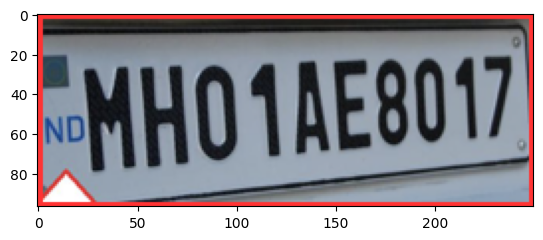

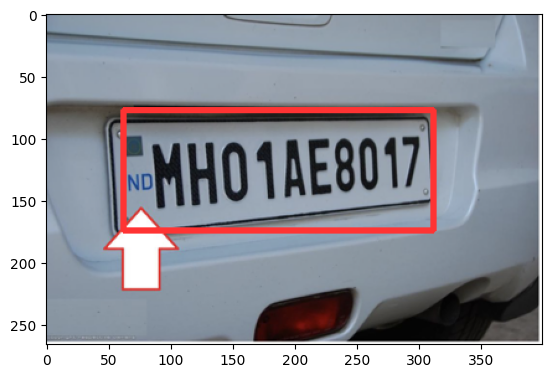

********************
log before contour detection 
(75, 333)

width of license plate is ==  75
lower_width =  5
upper_width =  37.0

HEIGHT of license plate is ==  333
lower height =  20.25
upper_height =  60.0
********************
image intitalized


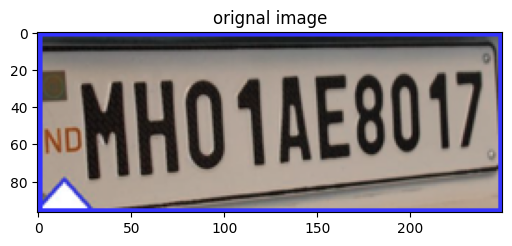

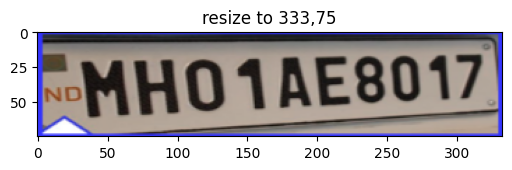

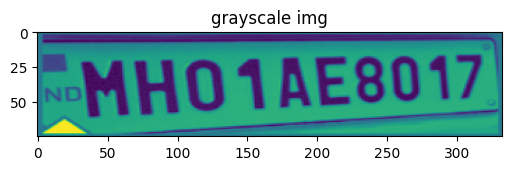

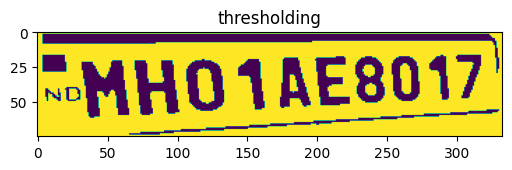

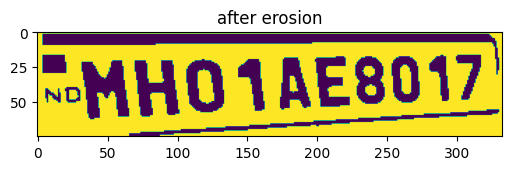

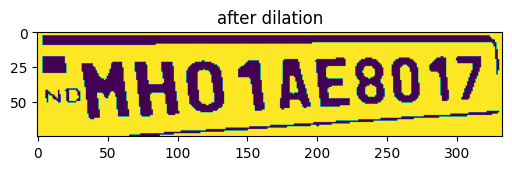

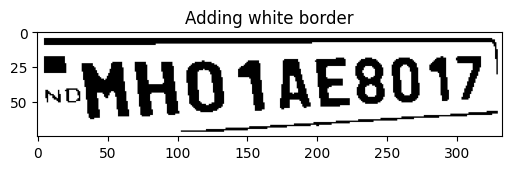

########################################
contour stats are
intx is ==  0
inty is ==  0
contour width is ==  333
contour height is ==  75
####################
****************************************
lower_width =  5
width of char contour is =  333
upper_width =  37.0

lower height =  20.25
height of char contour is =  75
upper_height =  60.0
********************
########################################
contour stats are
intx is ==  4
inty is ==  4
contour width is ==  327
contour height is ==  28
####################
****************************************
lower_width =  5
width of char contour is =  327
upper_width =  37.0

lower height =  20.25
height of char contour is =  28
upper_height =  60.0
********************
########################################
contour stats are
intx is ==  31
inty is ==  21
contour width is ==  36
contour height is ==  43
####################
****************************************
lower_width =  5
width of char contour is =  36
upper_width =  37.0

l

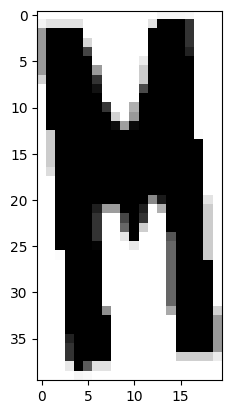

contour extracted


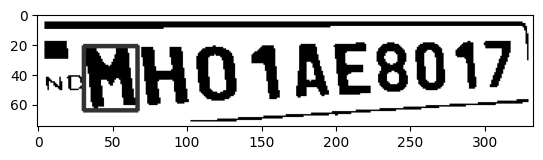

########################################
contour stats are
intx is ==  106
inty is ==  20
contour width is ==  29
contour height is ==  39
####################
****************************************
lower_width =  5
width of char contour is =  29
upper_width =  37.0

lower height =  20.25
height of char contour is =  39
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


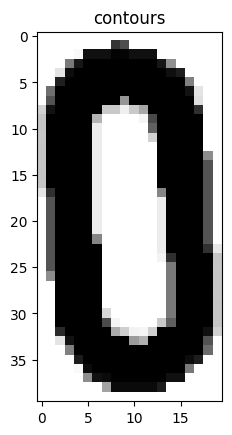

contour extracted


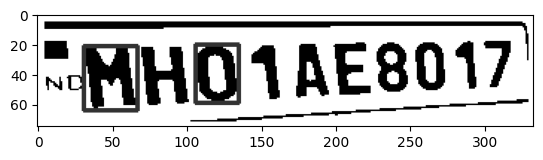

########################################
contour stats are
intx is ==  69
inty is ==  21
contour width is ==  34
contour height is ==  41
####################
****************************************
lower_width =  5
width of char contour is =  34
upper_width =  37.0

lower height =  20.25
height of char contour is =  41
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


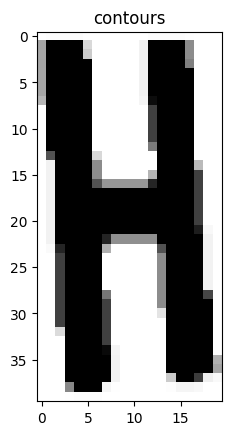

contour extracted


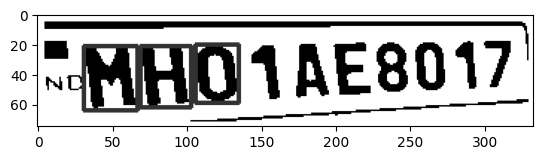

########################################
contour stats are
intx is ==  102
inty is ==  56
contour width is ==  229
contour height is ==  17
####################
****************************************
lower_width =  5
width of char contour is =  229
upper_width =  37.0

lower height =  20.25
height of char contour is =  17
upper_height =  60.0
********************
########################################
contour stats are
intx is ==  227
inty is ==  18
contour width is ==  23
contour height is ==  35
####################
****************************************
lower_width =  5
width of char contour is =  23
upper_width =  37.0

lower height =  20.25
height of char contour is =  35
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


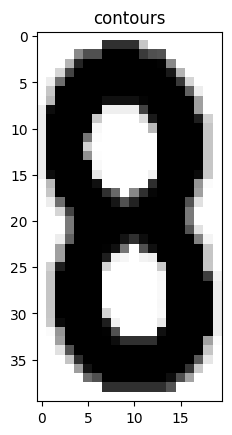

contour extracted


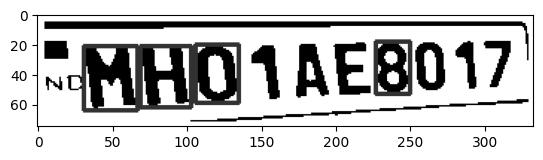

########################################
contour stats are
intx is ==  253
inty is ==  18
contour width is ==  22
contour height is ==  34
####################
****************************************
lower_width =  5
width of char contour is =  22
upper_width =  37.0

lower height =  20.25
height of char contour is =  34
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


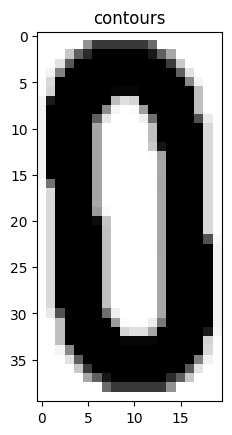

contour extracted


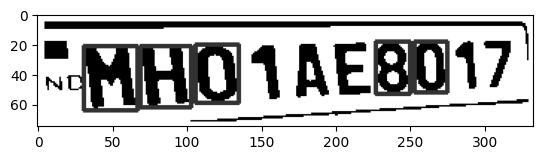

########################################
contour stats are
intx is ==  173
inty is ==  19
contour width is ==  24
contour height is ==  38
####################
****************************************
lower_width =  5
width of char contour is =  24
upper_width =  37.0

lower height =  20.25
height of char contour is =  38
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


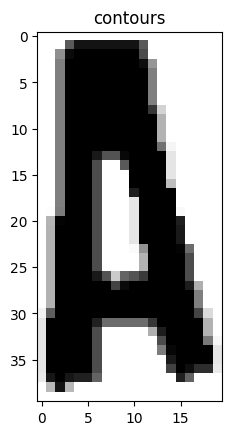

contour extracted


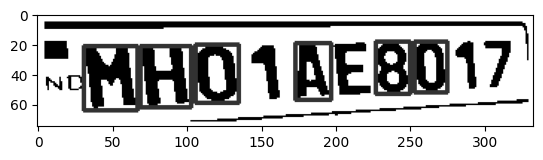

########################################
contour stats are
intx is ==  198
inty is ==  18
contour width is ==  27
contour height is ==  37
####################
****************************************
lower_width =  5
width of char contour is =  27
upper_width =  37.0

lower height =  20.25
height of char contour is =  37
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


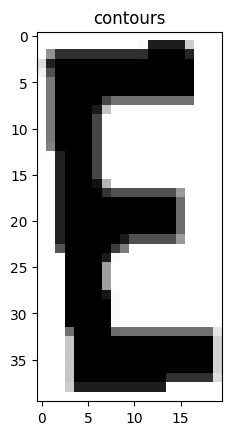

contour extracted


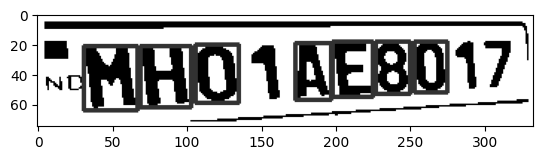

########################################
contour stats are
intx is ==  143
inty is ==  20
contour width is ==  21
contour height is ==  38
####################
****************************************
lower_width =  5
width of char contour is =  21
upper_width =  37.0

lower height =  20.25
height of char contour is =  38
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


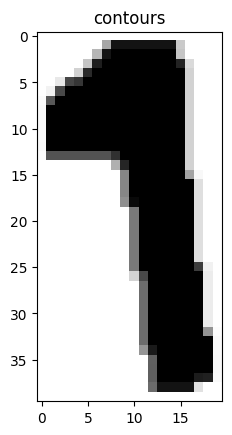

contour extracted


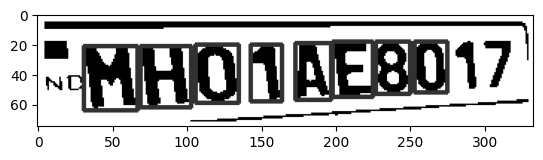

########################################
contour stats are
intx is ==  299
inty is ==  17
contour width is ==  20
contour height is ==  33
####################
****************************************
lower_width =  5
width of char contour is =  20
upper_width =  37.0

lower height =  20.25
height of char contour is =  33
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


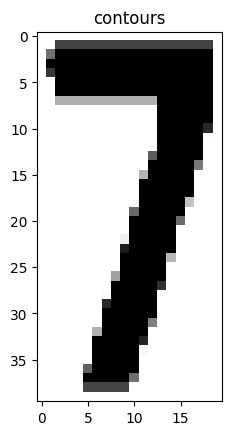

contour extracted


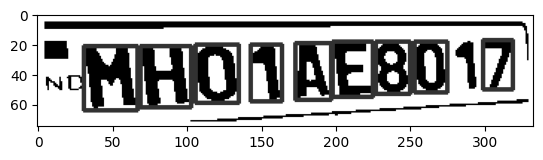

########################################
contour stats are
intx is ==  280
inty is ==  17
contour width is ==  16
contour height is ==  34
####################
****************************************
lower_width =  5
width of char contour is =  16
upper_width =  37.0

lower height =  20.25
height of char contour is =  34
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


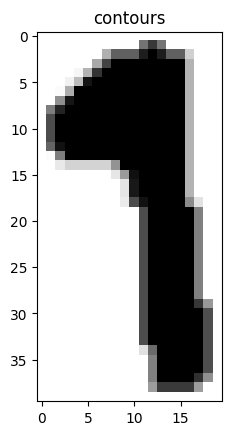

contour extracted


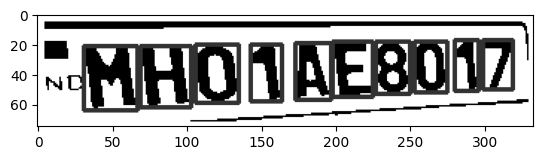

########################################
contour stats are
intx is ==  115
inty is ==  27
contour width is ==  12
contour height is ==  26
####################
****************************************
lower_width =  5
width of char contour is =  12
upper_width =  37.0

lower height =  20.25
height of char contour is =  26
upper_height =  60.0
********************
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
character detected
[*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*][*]
char extracted


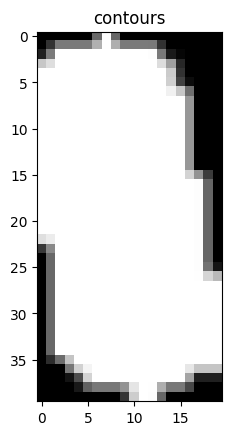

contour extracted


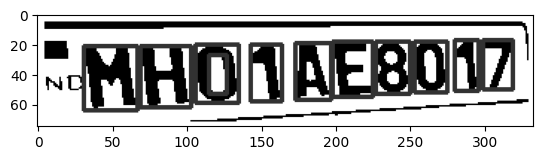

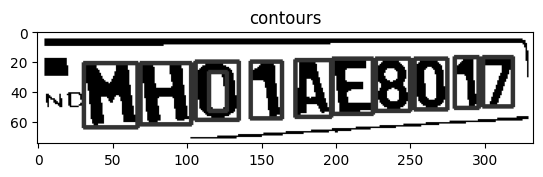

no of characters found are =  10


In [5]:
#YOLO

yolomodel = YOLO("datapath/to/pretrainedYOLO.pt")
img = cv2.imread("datapath/to/car2.png")

def disp_img(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

detections = yolomodel(img)[0]
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    print(detection)
    print(x1,x2,y1,y2)

plate_img = img.copy()
plate = plate_img[y1:y2, x1:x2, :]
cv2.rectangle(plate_img, (x1,y1), (x2,y2), (51,51,255), 3)
disp_img(plate)
disp_img(plate_img)

def segment_characters(image) :


    plt.figure(figsize=(6,18))
    plt.title('orignal image')
    plt.imshow(image)

    img = cv2.resize(image, (333, 75))
    plt.figure(figsize=(6,18))
    plt.title('resize to 333,75')
    plt.imshow(img)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(6,18))
    plt.title('grayscale img')
    plt.imshow(img_gray)
    
    _, img_binary = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure(figsize=(6,18))
    plt.title('thresholding')
    plt.imshow(img_binary)

    #erosion = shrinking of image boundaries
    img_erode = cv2.erode(img_binary, (3,3))
    plt.figure(figsize=(6,18))
    plt.title('after erosion')
    plt.imshow(img_erode)
    
    #expanding boundaries of foreground regions
    img_dilate = cv2.dilate(img_erode, (3,3))
    plt.figure(figsize=(6,18))
    plt.title('after dilation')
    plt.imshow(img_dilate)
    

    LP_WIDTH = img_dilate.shape[0]
    LP_HEIGHT = img_dilate.shape[1]

    #borders whitening
    img_dilate[0:5,:] = 255
    img_dilate[:,0:5] = 255
    img_dilate[72:75,:] = 255
    img_dilate[:,330:333] = 255
    plt.figure(figsize=(6,18))
    plt.title('Adding white border')
    plt.imshow(img_dilate)

    # Estimations of character contours sizes of cropped license plates
    dimensions = [5, LP_HEIGHT/9, 0.27*LP_WIDTH, .8*LP_WIDTH]

    # Get contours within cropped license plate
    char_list,ii = find_contours(dimensions, img_dilate)
    print('no of characters found are = ',len(char_list))
    return char_list,ii

charlist, ii = segment_characters(plate)

#### LOADING THE MODEL

In [6]:
# Load the trained model
model = models.load_model('OCR_Model')

In [7]:
def fix_dimension(img): 
    new_img = np.zeros((28, 28, 1))
    new_img[:, :, 0] = img
    return new_img

  
def show_results(char_list, model):
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i, c in enumerate(characters):
        dic[i] = c

    output = []
    for i, ch in enumerate(char_list):  #char iteration
        img_ = cv2.resize(ch, (28, 28))
        img = fix_dimension(img_)
        img = img.reshape(1, 28, 28, 1)  # single channel change
        y_probs = model.predict(img)[0]  # pred prop of each class
        y_ = np.argmax(y_probs)  # extracting the class with the hghst prob
        character = dic[y_]
        output.append(character)  # storing the result in a list

    plate_number = ''.join(output)

    return plate_number

print(show_results(charlist, model))
texttosay = show_results(charlist, model)

1/1 [==============================] - 0s 9ms/step
HH01AE8017
1/1 [==============================] - 0s 9ms/step
